**UCD_PA Specialist Certificate in Data Analytics Essentials -  Machine Learning (ML) Assignment**
# 10-year risk of future coronary heart disease (CHD) Prediction  machine learning

## DataSet Description

DataSet Source: [framingham-heart-study-dataset](https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset)

* Demographic Information
  * age: age of the participant in years
  * male: gender of the participant (1 = male, 0 = female)
  * education: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
  * currentSmoker: whether the participant is currently a smoker (1 = yes, 0 = no)
  * cigsPerDay: number of cigarettes smoked per day
* Medical Information
  * BPmeds: hether the participant is currently taking blood pressure medication (1 = yes, 0 = no)
  * prevalentStroke: whether or not the patient had previously had a stroke (1 = yes, 0 = no)
  * prevalentHyp: whether or not the patient was hypertensive (1 = yes, 0 = no)
  * diabetes:  whether the participant has a history of diabetes (1 = yes, 0 = no)
  * totChol: Total cholesterol (mg/dL)
  * sysBP: Systolic Blood Pressure (mmHg)
  * diaBP: Diastolic blood pressure (mmHg)
  * BMI: Body Mass Index, weight (kg)/height (m)^2
  * heartRate: Heart rate (beats/minute)
  * glucose: Blood glucose level (mg/dL)
*  Predicted Outcome
   *  TenYearCHD: the outcome variable indicating whether the participant developed CHD within 10 years (1 = yes, 0 = no)


## Import Libraries

In [319]:
# import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualisation
import seaborn as sns   #Seaborn for data visualisation
import matplotlib.pyplot as plt
#setting the standard color code ..styling
sns.set(color_codes=True) 

# sklearn libraries
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# imblearn libraries
from imblearn.over_sampling import RandomOverSampler


import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Custom Python Functions

In [276]:
## plots


def plot_feature_distributions(dataframe, title):
    """
    Plots the distribution of each feature in the dataset.

    Parameters: 
        dataframe: Pandas dataframe
        title: Text - plot title  
    
    Returns: 
        Display hist plots for dataframe
    """
    dataframe.hist(figsize=(20,10))
    plt.title(title)
    plt.show()


In [277]:
# Model functions

def get_model_results( df, target, sampler, scaler, model):
    """
    Build and evaluation model
    - prepare and split dataframe to X and y
    - split into training and test data , test size=0.3
    - resample training data
    - build and fit model
    - evaluate and output model scores
        - ROC Score
        - Classification Report
        - Confusion Matrix

    Parameters:
        df: dataframe
        target: label/ classifier columns name
        sampler:  Resampling method
        scaler: Scaling method
        model: ML algorithm (e.g. sklearn LogisticRegression)

    Returns:
        Prints model Scores

    """
    # Prep Data
    X, y = prep_data(df=df, target=target)

    # Split Data into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #resample training data
    X_resampled, y_resampled = sampler.fit_resample(X_train,y_train)

    # create Pipeline
    pipeline = make_pipeline(scaler, model)

    # Fit your training model to your training set
    pipeline.fit(X_resampled, y_resampled)

    # Obtain the predicted values and probabilities from the model 
    predicted = pipeline.predict(X_test)
    
    try:
        probs = pipeline.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

# Evaluate model
def evaluate_LR(y_test, y_pred):
    """ 
    Evaluate classification model
     - Calculate and print the classification report
     - Calculate and plot  Confusion Matrix

    Parameters:
        y_test: y_test data
        y_pred: predicted y data

    Returns:
        Prints classification report
        display confusrtion matrix chart
        cm:  confusion matrix
        scores:  accuracy, precision, f1

    """
  
    #print classification report)
    print(classification_report(y_test, y_pred))

    # Calculate the accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Calculate the precision
    precision = precision_score(y_test, y_pred)

    f1 = f1_score(y_test, y_pred)

    scores = (acc, precision, f1)

    # show confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm, annot=[
            [f"TP={cm[0][0]:.0f}",f"FP={cm[0][1]:.0f}"], 
            [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
            fmt='', 
            cmap="Blues")
    plt.show()
    return cm, scores

# prepare data in X, y
def prep_data(df, target):
    X = df.drop(target, axis=1)
    y = df[target]
    return X, y

## Import Dataset

In [278]:
# import  CSV file data into pandas dataframe 
df = pd.read_csv('DataSets/framingham.csv')

# Print Shape
print(df.shape)

(4238, 16)


##  Exploratory Data Analysis & Clean Data

In [279]:
# show first 5 rows of dataframe
print(df.shape)
df.head()

(4238, 16)


male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [280]:
# Describe data
df.describe().transpose()

count        mean        std     min     25%    50%  \
male             4238.0    0.429212   0.495022    0.00    0.00    0.0   
age              4238.0   49.584946   8.572160   32.00   42.00   49.0   
education        4133.0    1.978950   1.019791    1.00    1.00    2.0   
currentSmoker    4238.0    0.494101   0.500024    0.00    0.00    0.0   
cigsPerDay       4209.0    9.003089  11.920094    0.00    0.00    0.0   
BPMeds           4185.0    0.029630   0.169584    0.00    0.00    0.0   
prevalentStroke  4238.0    0.005899   0.076587    0.00    0.00    0.0   
prevalentHyp     4238.0    0.310524   0.462763    0.00    0.00    0.0   
diabetes         4238.0    0.025720   0.158316    0.00    0.00    0.0   
totChol          4188.0  236.721585  44.590334  107.00  206.00  234.0   
sysBP            4238.0  132.352407  22.038097   83.50  117.00  128.0   
diaBP            4238.0   82.893464  11.910850   48.00   75.00   82.0   
BMI              4219.0   25.802008   4.080111   15.54   23.07   25.4   
heartRate        4237.0   75.878924  12.026596   44.00   68.00   75.0   
glucose          3850.0   81.966753  23.959998   40.00   71.00   78.0   
TenYearCHD       4238.0    0.151958   0.359023    0.00    0.00    0.0   

                     75%    max  
male               1.000    1.0  
age               56.000   70.0  
education          3.000    4.0  
currentSmoker      1.000    1.0  
cigsPerDay        20.000   70.0  
BPMeds             0.000    1.0  
prevalentStroke    0.000    1.0  
prevalentHyp       1.000    1.0  
diabetes           0.000    1.0  
totChol          263.000  696.0  
sysBP            144.000  295.0  
diaBP             89.875  142.5  
BMI               28.040   56.8  
heartRate         83.000  143.0  
glucose           87.000  394.0  
TenYearCHD         0.000    1.0

In [281]:
df['TenYearCHD'].sum()

644

In [282]:
# df summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [283]:
# rename column male to gender
df.rename(columns = {'male':'gender'}, inplace = True)
df.head()

gender  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1   39        4.0              0         0.0     0.0                0   
1       0   46        2.0              0         0.0     0.0                0   
2       1   48        1.0              1        20.0     0.0                0   
3       0   61        3.0              1        30.0     0.0                0   
4       0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [284]:
# Number of observations in dataset  where the Predicted Outcome is predicted risk of CHD (developing CHD within 10 years)
all_target_1_count = df['TenYearCHD'].value_counts().values[1]
# Percentage of observations with a predicted risk of CHD in data set
percent_TenYearCHD = round((all_target_1_count/df.shape[0])*100, 1)

# Percentage of observations with  a predicted TenYearCHD (Target ==1)
print(f'dataset contains {percent_TenYearCHD}% observations where TenYearCHD target value == 1 ')

dataset contains 15.2% observations where TenYearCHD target value == 1 


In [285]:
# check for duplicates
df.duplicated().sum()

0

In [286]:
# Number of rows with Null Values
null_values = df.loc[df.isna().any(axis=1)]
count_null_rows = null_values.shape[0]

# null rows as percentage of dataset
percent_value = round( count_null_rows/df.shape[0]*100, 1)


# Total target == 1 (TenYearCHD) in null rows
null_target_1_count = null_values['TenYearCHD'].value_counts().values[1]

# target == 1 values as a percentage of all Target == 1 in data set
percent_target_null = round((null_target_1_count/all_target_1_count)*100, 1)

print(f'No.Null Value Row count: {count_null_rows}')
print(f'as % of dataset: {percent_value}')
print (f'Null rows account {percent_target_null} % of observations where TenYearCHD target value == 1 ')

No.Null Value Row count: 582
as % of dataset: 13.7
Null rows account 13.5 % of observations where TenYearCHD target value == 1 


In [287]:
# list columns with null values and counts
df.isna().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
gender               0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [266]:
# list of categorical columns 
categorical_columns = ['gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke','prevalentHyp','diabetes', 'TenYearCHD']

#list of numerical columns (continuous)
numerical_columns = ['age', 'cigsPerDay', 'totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

Notes: 

1. 4238 number of observations/rows in dataset
2. 15.2% target class ==1  unbalanced data  and potentially require resmapling in preprocessing stage
3. Data types (floats and integers only)
4. No duplicated rows
5. Null Values
   1. Number of rows with null values 582 which equates to 13.7% of observations
   2. Null rows account for 13.5% of all observations with risk of heart disease (TenYearCHD)
   3. dropping null values would lead  significant to loss of data
   4. replace null values in preprocessing with mean value ( for nominal columns replace with median)



In [288]:
# Replace null values with means in the numerical columns (heartRate, glucose, cigsPerDay, totChol, BMI  )

df.heartRate.fillna(df.heartRate.mean(), inplace=True)
df.glucose.fillna(df.glucose.mean(), inplace=True)
df.cigsPerDay.fillna(df.cigsPerDay.mean(), inplace=True)
df.totChol.fillna(df.totChol.mean(), inplace=True)
df.BMI.fillna(df.BMI.mean(), inplace=True)

# replace  null values with with median values for categorical columns (education, BPMeds)
df.education.fillna(df.education.median(), inplace=True)
df.BPMeds.fillna(df.BPMeds.median(), inplace=True)

# verify no more null values
df.isna().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [289]:
# education: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
df['education'] = df['education'].astype('int64')
#cigsPerDay: number of cigarettes smoked per day
# convert  education  and cigPerday to ints (float to integers)
df['cigsPerDay'] = df['cigsPerDay'].astype('int64')
df.head()

gender  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1   39          4              0           0     0.0                0   
1       0   46          2              0           0     0.0                0   
2       1   48          1              1          20     0.0                0   
3       0   61          3              1          30     0.0                0   
4       0   46          3              1          23     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [292]:
# set data types for categorical columns
df = df.astype({
    "education":'category', 
    'gender': 'category', 
    'currentSmoker': 'category',
    'prevalentHyp': 'category',
    'BPMeds':'category', 
    'prevalentStroke': 'category', 
    'diabetes': 'category',
    'TenYearCHD': 'category'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   gender           4238 non-null   category
 1   age              4238 non-null   int64   
 2   education        4238 non-null   category
 3   currentSmoker    4238 non-null   category
 4   cigsPerDay       4238 non-null   int64   
 5   BPMeds           4238 non-null   category
 6   prevalentStroke  4238 non-null   category
 7   prevalentHyp     4238 non-null   category
 8   diabetes         4238 non-null   category
 9   totChol          4238 non-null   float64 
 10  sysBP            4238 non-null   float64 
 11  diaBP            4238 non-null   float64 
 12  BMI              4238 non-null   float64 
 13  heartRate        4238 non-null   float64 
 14  glucose          4238 non-null   float64 
 15  TenYearCHD       4238 non-null   category
dtypes: category(8), float64(6), int64(2)
memor

### Visualise Data

#### Count Plots

Text(0.5, 1.0, 'TenYearCHD by prediction')

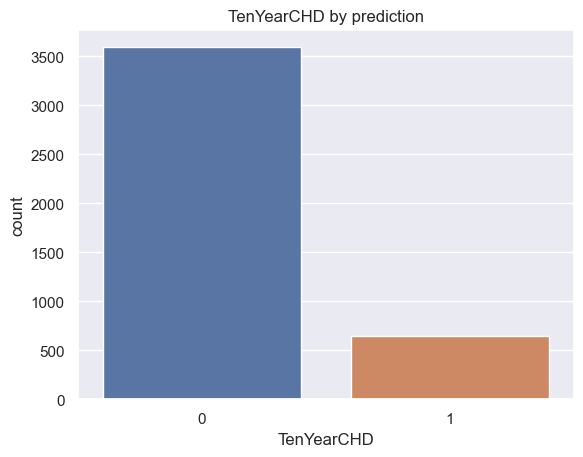

In [303]:
# Plot  
sns.countplot(x='TenYearCHD',data=df)
plt.title('TenYearCHD by prediction')

Text(0.5, 1.0, 'TenYearCHD by Gender')

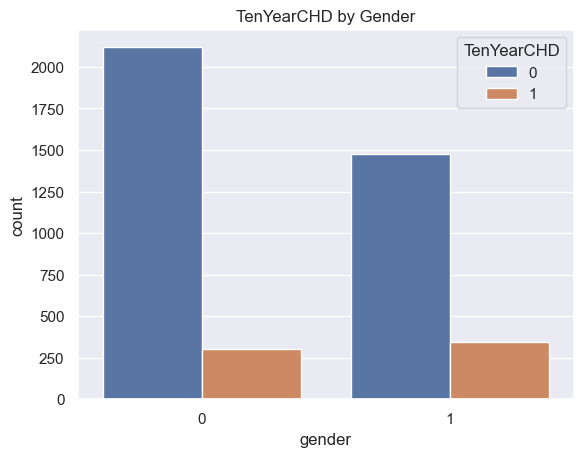

In [304]:
# TenYearCHD by gender
sns.countplot(x='gender',data=df, hue='TenYearCHD')
plt.title('TenYearCHD by Gender')

In [305]:
df_tenyearchd = df[(df['TenYearCHD'] == 1)]  # filter for cases of 10-year CHD and class = 1
gender_count = df['gender'].value_counts()
count_by_gender = df_tenyearchd.groupby(['gender']).count()['TenYearCHD']  # group by gender and count occurrences of 10-year CHD

female_CHD = round((count_by_gender[0]/gender_count[0])*100, 2)
print(f'{female_CHD} of females have a risk of CHD')
male_CHD = round((count_by_gender[1]/gender_count[1])*100, 2)
print(f'{male_CHD} of males have a risk of CHD')

12.44 of females have a risk of CHD
18.86 of males have a risk of CHD


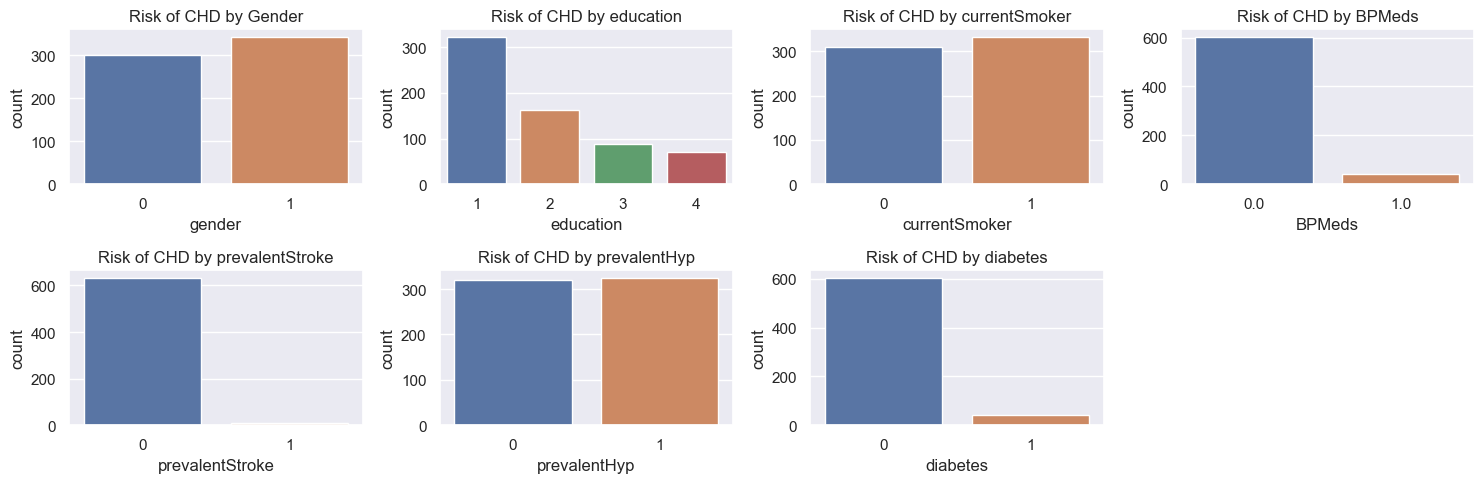

In [306]:
# plot barchart of categorical columns where TenYearCHD == 1 ( only observations with a predicted risk of CHD)
# # list of categorical columns 'gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke','prevalentHyp','diabetes', 

df_chd = df[df['TenYearCHD'] == 1] #  filter rows with predicted CHD
fig, ax = plt.subplots(2, 4, figsize=(15, 5))

# Plot the distribution of gender
sns.countplot(x='gender', data=df_chd, ax=ax[0, 0])
ax[0,0].set_title("Risk of CHD by Gender")

# Plot the distribution of education
sns.countplot(x='education', data=df_chd, ax=ax[0,1])
ax[0,1].set_title("Risk of CHD by education")

# Plot the distribution of current smoking status
sns.countplot(x='currentSmoker', data=df_chd, ax=ax[0,2])
ax[0,2].set_title("Risk of CHD by currentSmoker")

# Plot the distribution of BPMeds
sns.countplot(x='BPMeds', data=df_chd, ax=ax[0,3])
ax[0,3].set_title("Risk of CHD by BPMeds")

# # Plot the distribution of prevalentStroke
sns.countplot(x='prevalentStroke', data=df_chd, ax=ax[1,0])
ax[1,0].set_title("Risk of CHD by prevalentStroke")

# Plot the distribution of prevalentHyp
sns.countplot(x='prevalentHyp', data=df_chd, ax=ax[1,1])
ax[1,1].set_title("Risk of CHD by prevalentHyp")

# Plot the distribution of diabetes
sns.countplot(x='diabetes', data=df_chd, ax=ax[1,2])
ax[1,2].set_title("Risk of CHD by diabetes")

fig.delaxes(ax[1,3]) # remove empty subplot
plt.tight_layout()
plt.show()


In [307]:
#counts from filtered dataset df_chd (Target (TenYearCHD) == 1)
bpmeds_count = df_chd['BPMeds'].value_counts()
prevStroke_count = df_chd['prevalentStroke'].value_counts()
prevHyp_count = df_chd['prevalentHyp'].value_counts()
diabetes_count = df_chd['diabetes'].value_counts()

print(f'BPMeds: \n{bpmeds_count}')
print(f'\nprevalentStroke: \n{prevStroke_count}')
print(f'\nprevalentHyp: \n{prevHyp_count}')
print(f'\ndiabetes: \n{diabetes_count}')


BPMeds: 
0.0    603
1.0     41
Name: BPMeds, dtype: int64

prevalentStroke: 
0    633
1     11
Name: prevalentStroke, dtype: int64

prevalentHyp: 
1    325
0    319
Name: prevalentHyp, dtype: int64

diabetes: 
0    604
1     40
Name: diabetes, dtype: int64


  **Observations (count plot target and gender)**
* TenYearCHD : The 10 year risk of coronary heart disease(CHD). 
  * 1 = Yes risk of CHD
  * 0 = No potential risk of CHD
* 15%  of the total observations are classed the Risk of CHD (4238 total observations)
  * Imblanced dataset: training the model with this dataset lead to a bias towards the majority class only, e.f. no risk of CHD (0). This will therefore have an impact on predict the risk of CHD.
  * In preprocessing and modeling steps, evaluate model (e.g. random over sampling or SMOTE) with resampled and un-resampled data.
* gender: higher proportion of males have a risk of CHD
* eduction: level of education has appears to be related to CHD
* currentSmoker: more smokers  have a risk of CHD than non smokers
* BPMeds, prevalentStroke, Diabetes :  do not appear to show more instances of CHD, however,  the small numbers of these types with predicted as a risk of CHD

#### Pair Plots

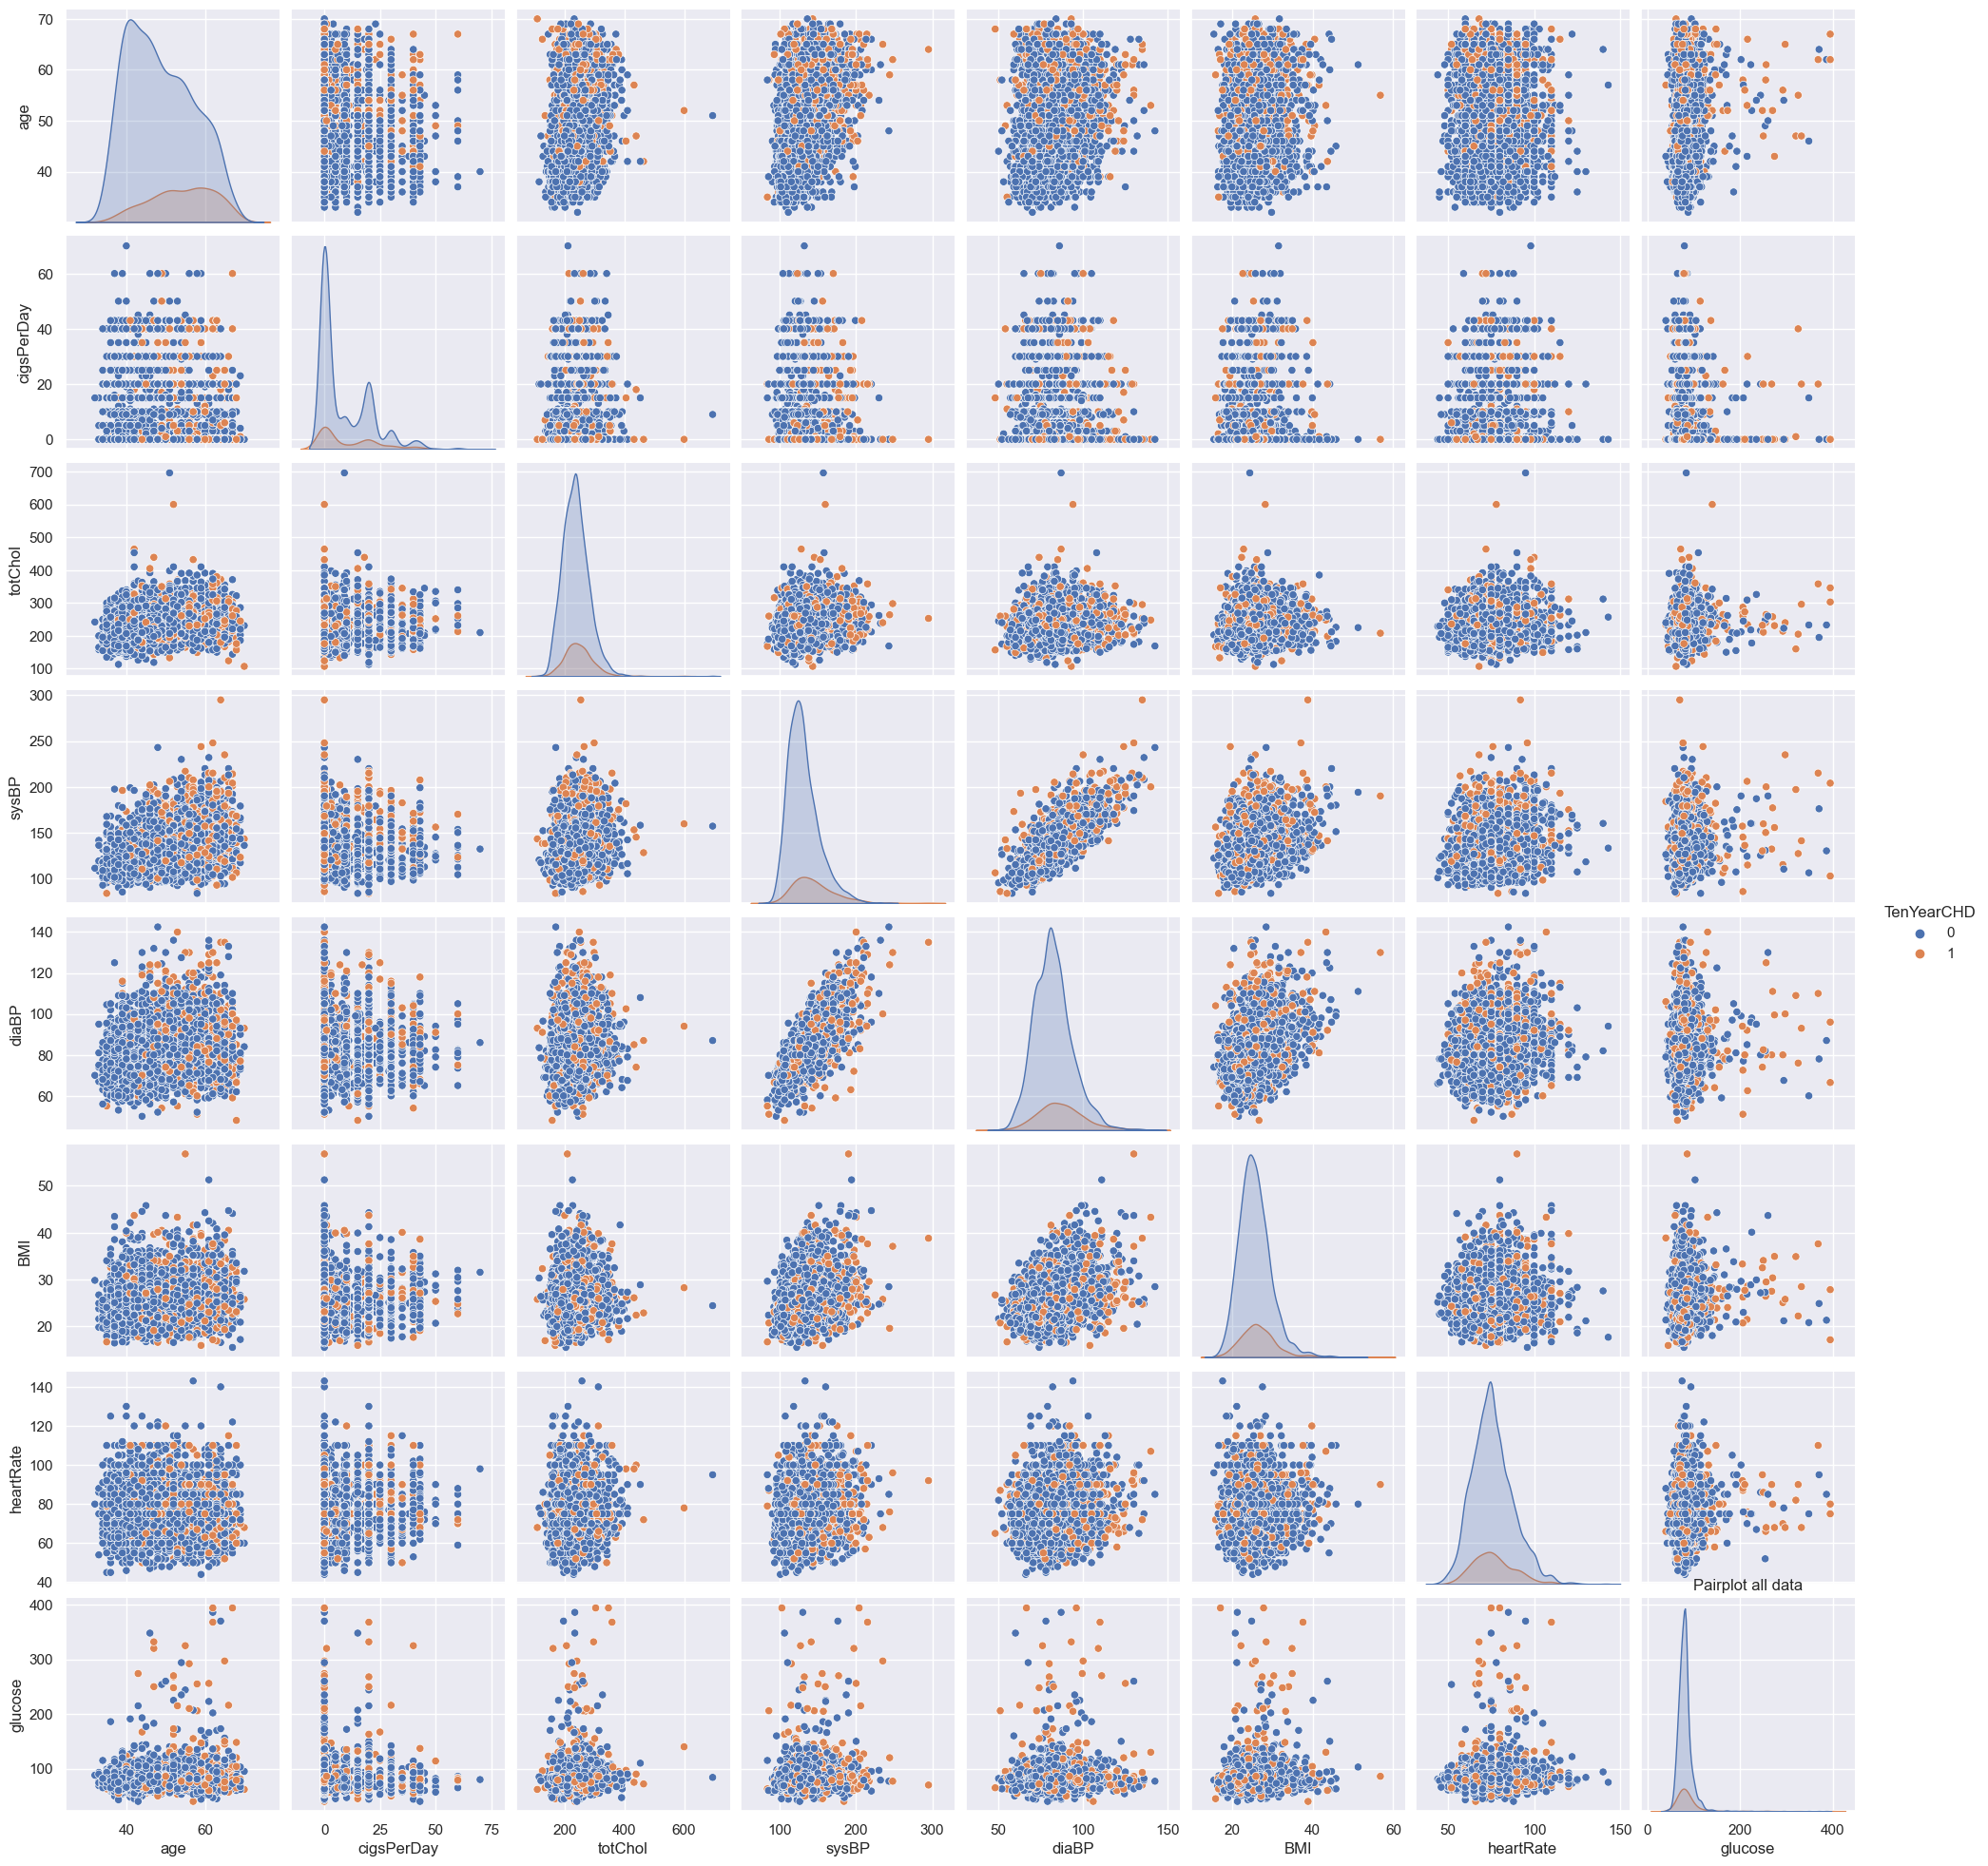

In [308]:
# Pair plot to visualise relationships between the features/columns
# hue: highlight target classes
sns.pairplot(df, hue="TenYearCHD")
plt.title ('Pairplot all data')
plt.show()

In [309]:
# Pair plot to visualise relationships between the numerical columns 
column_numerical_pairplot = numerical_columns
column_numerical_pairplot.append('TenYearCHD')
sns.pairplot(df[column_numerical_pairplot], hue="TenYearCHD")
plt.title ('Pairplot all numerical columns ')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

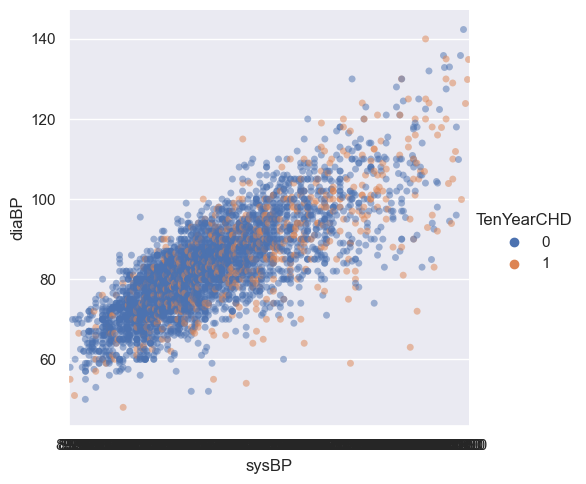

In [ ]:
sns.catplot(
    x='sysBP',
    y='diaBP',
    hue='TenYearCHD',
    alpha = 0.5,
    data=df
)

**observations (Pair Plot)**

from the pair plots no obvious separation of the target class

`age`:  values for `totChol`, `sysBP`, `diaBP`, `BMI`, `heartRate` and `glucose` are higher as the age increased

`sysBp`: positive linear relationship between `diaBp`
 

<AxesSubplot:xlabel='glucose', ylabel='diaBP'>

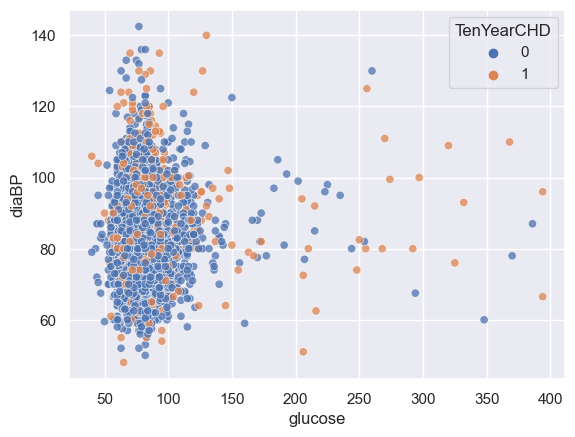

In [ ]:
sns.scatterplot(
    x='glucose',
    y='diaBP',
    hue='TenYearCHD',
    markers='o',
    alpha=0.75,
    data=df)

#### Correlation Plots

In [ ]:
# corrlation matrix
df_corr = df.corr()
df_corr

gender       age  education  currentSmoker  cigsPerDay  \
gender           1.000000 -0.028979   0.017205       0.197596    0.316807   
age             -0.028979  1.000000  -0.163547      -0.213748   -0.192366   
education        0.017205 -0.163547   1.000000       0.018273    0.007916   
currentSmoker    0.197596 -0.213748   0.018273       1.000000    0.766970   
cigsPerDay       0.316807 -0.192366   0.007916       0.766970    1.000000   
BPMeds          -0.051545  0.120955  -0.010365      -0.048358   -0.045663   
prevalentStroke -0.004546  0.057655  -0.035150      -0.032988   -0.032706   
prevalentHyp     0.005313  0.307194  -0.081021      -0.103260   -0.065947   
diabetes         0.015708  0.101258  -0.038136      -0.044295   -0.037063   
totChol         -0.069974  0.260270  -0.022479      -0.046285   -0.026025   
sysBP           -0.035989  0.394302  -0.128273      -0.130230   -0.088505   
diaBP            0.057933  0.206104  -0.061719      -0.107746   -0.056391   
BMI              0.081506  0.135283  -0.135518      -0.167276   -0.092453   
heartRate       -0.116601 -0.012819  -0.053700       0.062348    0.074851   
glucose          0.005818  0.116850  -0.033700      -0.054157   -0.056088   
TenYearCHD       0.088428  0.225256  -0.053383       0.019456    0.057775   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
gender          -0.051545        -0.004546      0.005313  0.015708 -0.069974   
age              0.120955         0.057655      0.307194  0.101258  0.260270   
education       -0.010365        -0.035150     -0.081021 -0.038136 -0.022479   
currentSmoker   -0.048358        -0.032988     -0.103260 -0.044295 -0.046285   
cigsPerDay      -0.045663        -0.032706     -0.065947 -0.037063 -0.026025   
BPMeds           1.000000         0.114609      0.258697  0.051394  0.078712   
prevalentStroke  0.114609         1.000000      0.074830  0.006949  0.000067   
prevalentHyp     0.258697         0.074830      1.000000  0.077808  0.163041   
diabetes         0.051394         0.006949      0.077808  1.000000  0.040092   
totChol          0.078712         0.000067      0.163041  0.040092  1.000000   
sysBP            0.251503         0.057009      0.696755  0.111283  0.207609   
diaBP            0.192356         0.045190      0.615751  0.050329  0.163903   
BMI              0.099647         0.024840      0.300572  0.086250  0.114789   
heartRate        0.015139        -0.017676      0.147222  0.048993  0.090676   
glucose          0.048856         0.018055      0.082924  0.605705  0.044583   
TenYearCHD       0.086417         0.061810      0.177603  0.097317  0.081624   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
gender          -0.035989  0.057933  0.081506  -0.116601  0.005818    0.088428  
age              0.394302  0.206104  0.135283  -0.012819  0.116850    0.225256  
education       -0.128273 -0.061719 -0.135518  -0.053700 -0.033700   -0.053383  
currentSmoker   -0.130230 -0.107746 -0.167276   0.062348 -0.054157    0.019456  
cigsPerDay      -0.088505 -0.056391 -0.092453   0.074851 -0.056088    0.057775  
BPMeds           0.251503  0.192356  0.099647   0.015139  0.048856    0.086417  
prevalentStroke  0.057009  0.045190  0.024840  -0.017676  0.018055    0.061810  
prevalentHyp     0.696755  0.615751  0.300572   0.147222  0.082924    0.177603  
diabetes         0.111283  0.050329  0.086250   0.048993  0.605705    0.097317  
totChol          0.207609  0.163903  0.114789   0.090676  0.044583    0.081624  
sysBP            1.000000  0.784002  0.325247   0.182174  0.134608    0.216429  
diaBP            0.784002  1.000000  0.376544   0.181246  0.058647    0.145299  
BMI              0.325247  0.376544  1.000000   0.067544  0.082109    0.074680  
heartRate        0.182174  0.181246  0.067544   1.000000  0.089341    0.022898  
glucose          0.134608  0.058647  0.082109   0.089341  1.000000    0.120406  
TenYearCHD       0.216429  0.145299  0.074680   0.02

<AxesSubplot:>

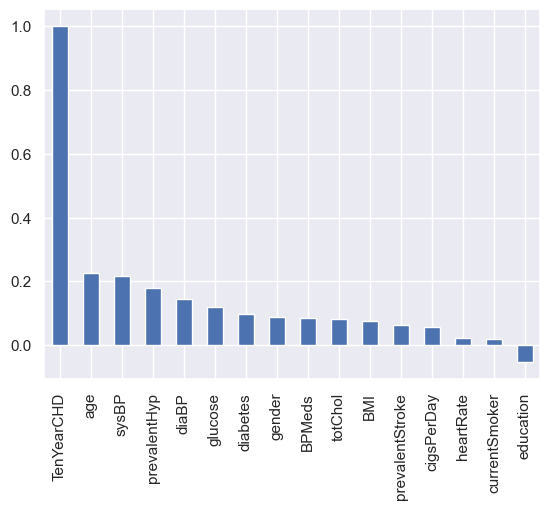

In [ ]:
# list the correlations of  the features to target
df_corr_TenYearCHD = df_corr['TenYearCHD'].sort_values(ascending=False)
df_corr_TenYearCHD.plot(kind='bar')


In [ ]:
df_corr_TenYearCHD

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.120406
diabetes           0.097317
gender             0.088428
BPMeds             0.086417
totChol            0.081624
BMI                0.074680
prevalentStroke    0.061810
cigsPerDay         0.057775
heartRate          0.022898
currentSmoker      0.019456
education         -0.053383
Name: TenYearCHD, dtype: float64

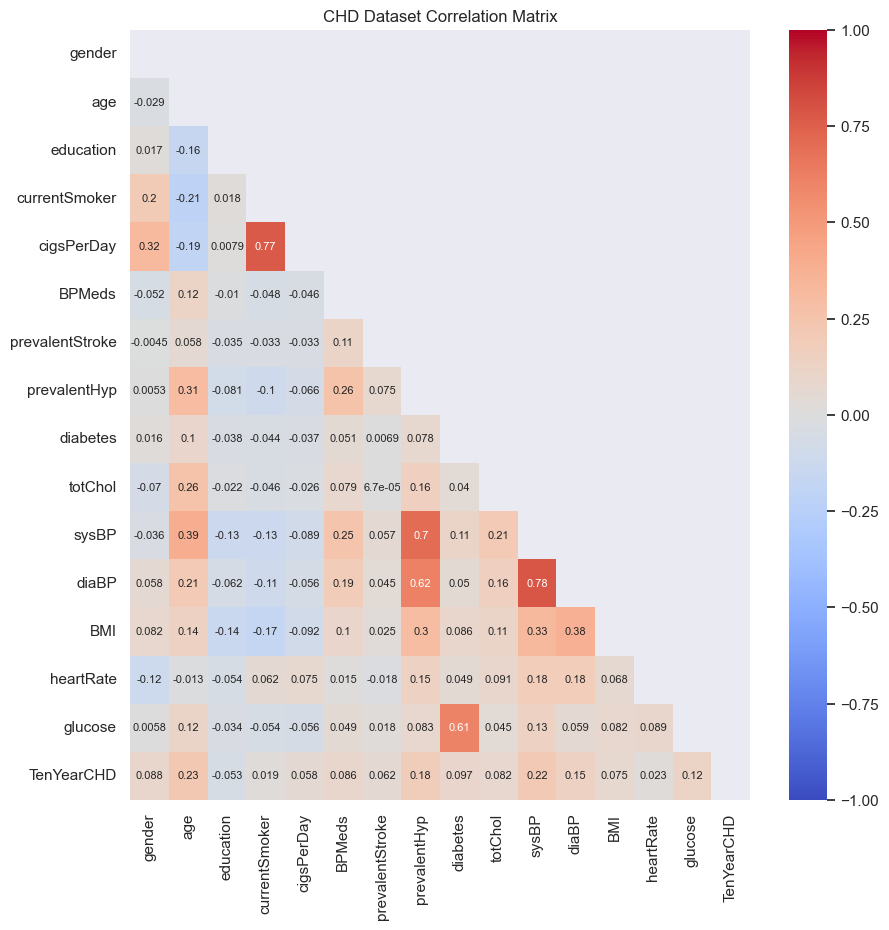

In [ ]:

# Plot the correlation matrix of the dataset

# Create a mask upper triangle
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

sns.set(font_scale=1.0)
plt.figure(figsize=(10,10))
sns.heatmap(
    df_corr, 
    annot=True, 
    annot_kws={'size': 8}, 
    cmap='coolwarm', 
    cbar=True, 
    vmin=-1, 
    vmax=1, 
    mask=mask
    )

# Show the plot
plt.title('CHD Dataset Correlation Matrix')
plt.show()


**Observations (Correlation)**
- Correlation of Features with Target
  - `heartRate`  and `currentSmoker` have a low correlation with target
  - the following features have a weak positive correlation with the target
      - `age`, `sysBP`, `preprevalentHyp`, `diaBP`, glucose, gender, `BPMed`s, `totChol`, `BMI`, `prevalentStroke`, `cigs per day`
      - `age` has the highest positive correlation to target, which would indicate that as age increases, the risk of CHD will also increase.
  - `education` has a weak negative correlation with the target which would potentially indicate that higher levels of education could have a reduced risk of CHD
- Correlation between Features
  - There is high correlation between `currentSmoker` and `cigsPerDay`, which is to be expected. Arguably there is some duplication in the information provided in these two columns, a nonsmoker will be a value of 0 in the `cigsPerDay` column. Therefore, we can drop the `currentSmoker` column
  - `sysBP`  and `diaBP`  and `preprevalentHyp`  have a high correlation and we could potentially drop one or columns
  - `diabetes` and `glucose` have a have correlation again potentially
  -  depandant features contribute little  in predicting the output but incresease the computational cost.  
  -  TODO: remove some for testing later
- 

In [ ]:
# Drop `currentSmoker` feature
df =  df.drop('currentSmoker', axis=1)
print(df.shape)
df.head()

(4238, 15)


gender  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0       1   39        4.0         0.0     0.0                0             0   
1       0   46        2.0         0.0     0.0                0             0   
2       1   48        1.0        20.0     0.0                0             0   
3       0   61        3.0        30.0     0.0                0             1   
4       0   46        3.0        23.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0         0    195.0  106.0   70.0  26.97       80.0     77.0           0  
1         0    250.0  121.0   81.0  28.73       95.0     76.0           0  
2         0    245.0  127.5   80.0  25.34       75.0     70.0           0  
3         0    225.0  150.0   95.0  28.58       65.0    103.0           1  
4         0    285.0  130.0   84.0  23.10       85.0     85.0           0

#### Data Distribution 
box and distribution Plots


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>],
       [<AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>, <AxesSubplot:>]],
      dtype=object)

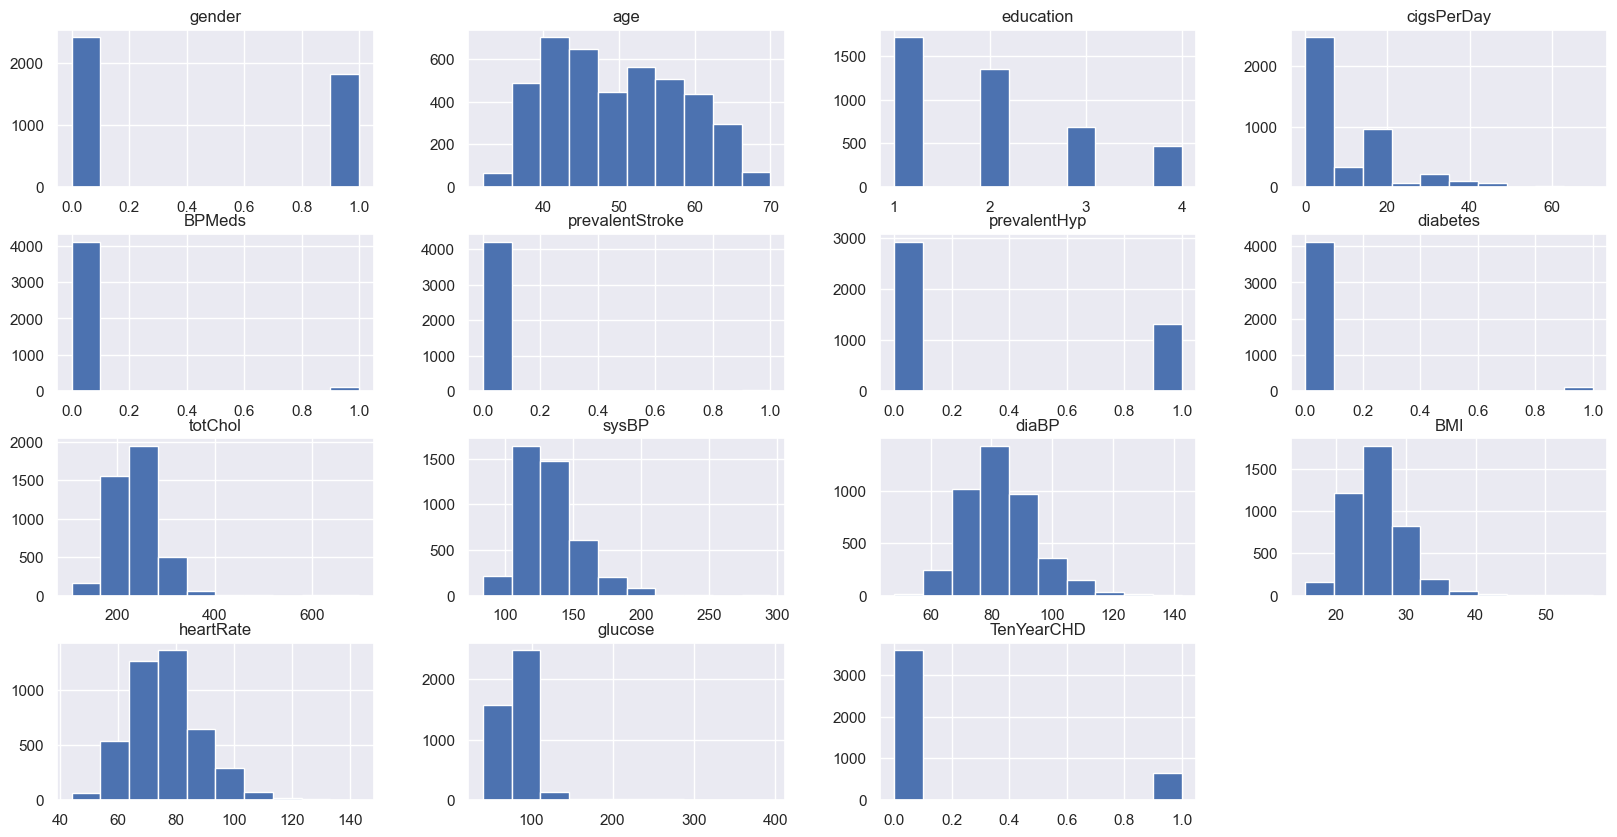

In [ ]:
df.hist(figsize=(20,10))

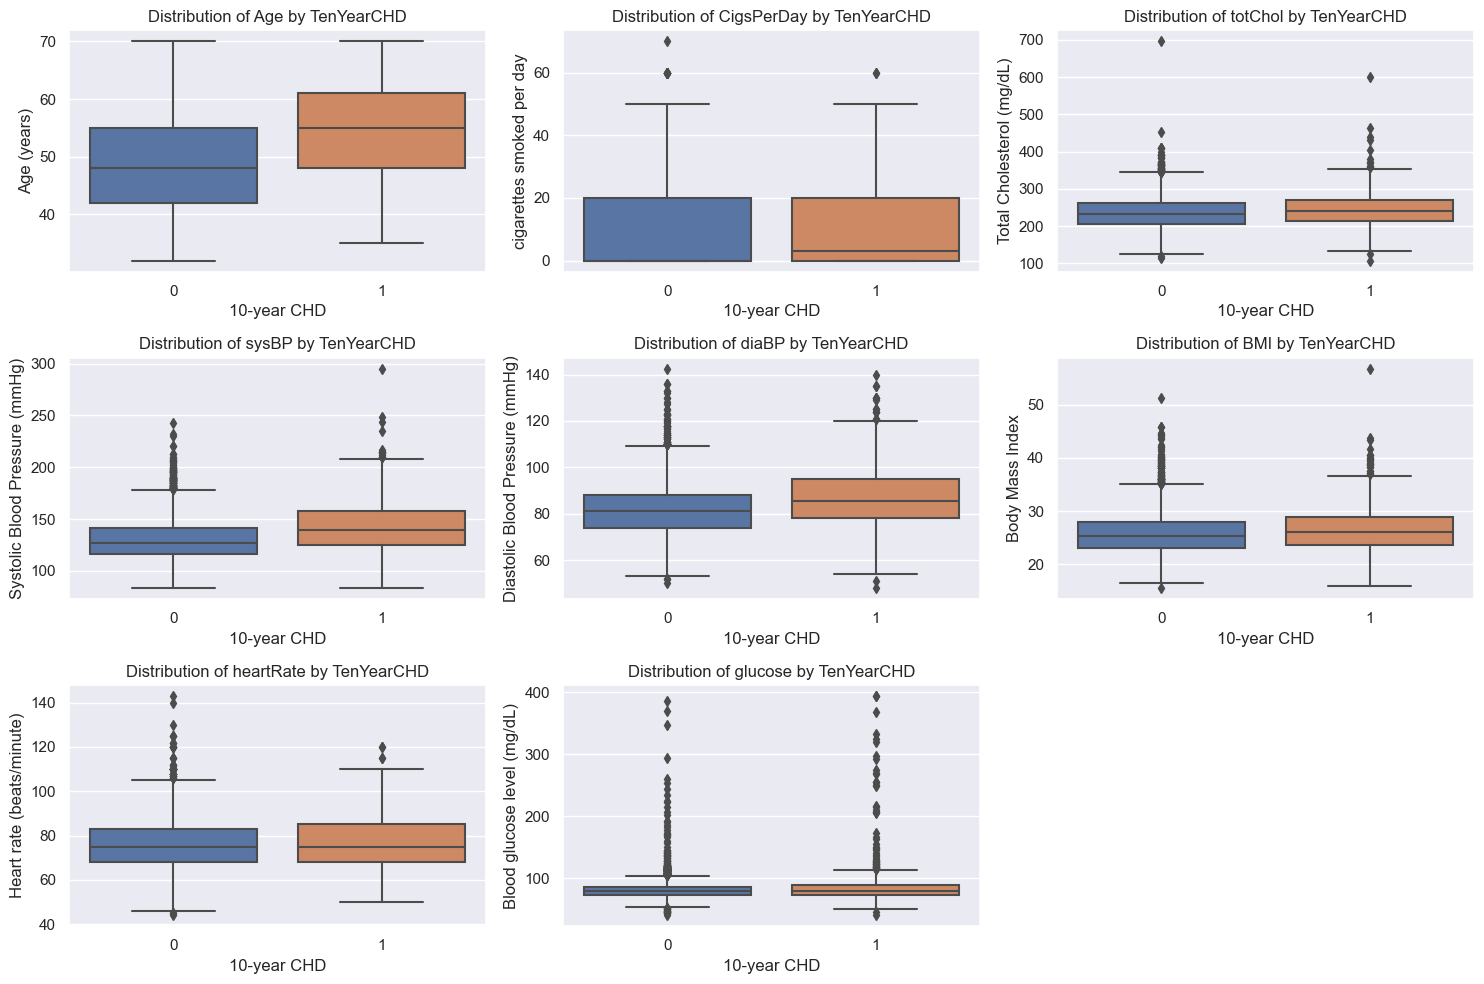

In [ ]:
# Box plots of numerical values by Target
# 'age', 'cigsPerDay', 'totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'

fig, ax = plt.subplots(3, 3, figsize=(15, 10))

#age
sns.boxplot(x='TenYearCHD', y='age', data=df, ax=ax[0,0])
ax[0,0].set(xlabel='10-year CHD', ylabel='Age (years)', title='Distribution of Age by TenYearCHD')

# cigsPerDay
sns.boxplot(x='TenYearCHD', y='cigsPerDay', data=df, ax=ax[0,1])
ax[0,1].set(xlabel='10-year CHD', ylabel='cigarettes smoked per day', title='Distribution of CigsPerDay by TenYearCHD')

# totChol
sns.boxplot(x='TenYearCHD', y='totChol', data=df, ax=ax[0,2])
ax[0,2].set(xlabel='10-year CHD', ylabel='Total Cholesterol (mg/dL)', title='Distribution of totChol by TenYearCHD')

# sysBP
sns.boxplot(x='TenYearCHD', y='sysBP', data=df, ax=ax[1,0])
ax[1,0].set(xlabel='10-year CHD', ylabel='Systolic Blood Pressure (mmHg)', title='Distribution of sysBP by TenYearCHD')

# diaBP
sns.boxplot(x='TenYearCHD', y='diaBP', data=df, ax=ax[1,1])
ax[1,1].set(xlabel='10-year CHD', ylabel='Diastolic Blood Pressure (mmHg)', title='Distribution of diaBP by TenYearCHD')

# BMI
sns.boxplot(x='TenYearCHD', y='BMI', data=df, ax=ax[1,2])
ax[1,2].set(xlabel='10-year CHD', ylabel='Body Mass Index', title='Distribution of BMI by TenYearCHD')

# heartRate
sns.boxplot(x='TenYearCHD', y='heartRate', data=df, ax=ax[2,0])
ax[2,0].set(xlabel='10-year CHD', ylabel='Heart rate (beats/minute)', title='Distribution of heartRate by TenYearCHD')

# glucose
sns.boxplot(x='TenYearCHD', y='glucose', data=df, ax=ax[2,1])
ax[2,1].set(xlabel='10-year CHD', ylabel='Blood glucose level (mg/dL)', title='Distribution of glucose by TenYearCHD')

fig.delaxes(ax[2,2]) # remove empty subplot
plt.tight_layout()
plt.show()

**Observations (Box plots)**

- Outliers very noticable in the following columns
  - `totChol` , `sysBP`, `diaBP`, `BMI`, `heartRate`, `glucose`




In [ ]:
def outlier_std_cutoff_values(df, feature_name):
    """ Calculate lower and upper values 3*std

    Args:
        df (dataframe): pands data frame
        feature_name (text): feature name
    """
    population_mean = df[feature_name].mean()
    population_std = df[feature_name].std()
    cut_off = population_std * 3
    lower = population_mean - cut_off
    upper =  population_mean + cut_off

    #print(round(lower,2), round( upper, 2))
    return lower, upper


def plot_box_and_hist(df, feature_name, ylabel_text):
    """Plot  two chart side by side
        - a box plot of a feature  by TenYearCHD prediction
        - histogram of feature

    Args:
        df (dataframe): pandas dataframe
        feature (text):  feature name
        ylabel (text): y axis label
    """
    
    fig, ax = plt.subplots(1,2, figsize=(10, 5))

    sns.boxplot(x='TenYearCHD', y=feature_name, data=df, ax=ax[0])
    ax[0].set(xlabel='10-year CHD', ylabel=ylabel_text, title=f'Boxplot of {feature_name} by TenYearCHD')

    sns.histplot(x= feature_name, data=df,kde=True, ax=ax[1])
    sns.rugplot(x=feature_name, data=df, ax=ax[1])
    ax[1].set(xlabel=feature_name, ylabel='count', title=f'Distribution of {feature_name} ')

    plt.tight_layout()
    plt.show()

def outlier_counts_info(df,feature_name):
    outliers_upper =  df[(df[feature_name] > outlier_upper_lower_values[feature_name]['upper'])]
    print(f'\nNumber of Outliers above Upper Boundary (row count) : {outliers_upper.shape}')
    print('\nTenYearCHD Counts')
    print(outliers_upper['TenYearCHD'].value_counts())

    outliers_lower =  df[(df[feature_name] < outlier_upper_lower_values[feature_name]['lower'])]
    print(f'\nNumber of Outliers below Lower Boundary(row count) : {outliers_lower.shape}')
    print('\nTenYearCHD Counts')
    print(outliers_lower['TenYearCHD'].value_counts())


In [ ]:
# 3 deviations from mean, calculate upper and lower values for, cigPerDay, totChol,sysBP, diaBP, BMI, heartRate, glucose

outlier_upper_lower_values= {} # hold values for each feature
columns_to_get_outlier_boundaries = ['sysBP','diaBP','glucose','totChol', 'BMI', 'cigsPerDay','heartRate' ] # order based on correlation with TenYearCHD (desc)

for  col in columns_to_get_outlier_boundaries:
    lower,upper = outlier_std_cutoff_values(df,col) 
    outlier_upper_lower_values[col] =  {'lower': lower, 'upper': upper}

print(outlier_upper_lower_values)

{'sysBP': {'lower': 66.23811686502458, 'upper': 198.4666967262921}, 'diaBP': {'lower': 47.16091509738871, 'upper': 118.62601269874153}, 'glucose': {'lower': 13.456943864961474, 'upper': 150.47656262854503}, 'totChol': {'lower': 103.74222755894743, 'upper': 369.7009434057135}, 'BMI': {'lower': 13.589149927526455, 'upper': 38.014865241944975}, 'cigsPerDay': {'lower': -26.634602015104086, 'upper': 44.64077925435331}, 'heartRate': {'lower': 39.803392667861786, 'upper': 111.95445486577047}}


#### Review Outliers

##### sysBP

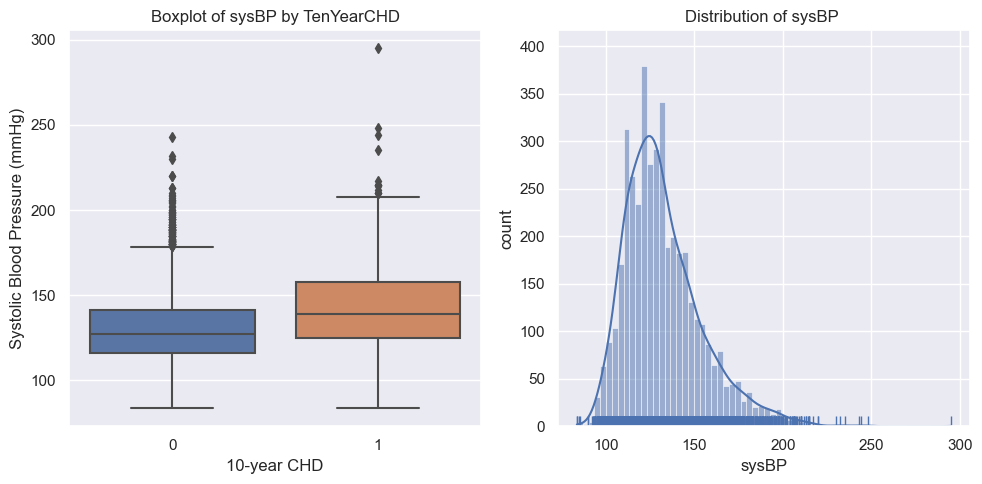

In [ ]:
# sysBP
# Plt box plot and histogram
plot_box_and_hist(df,columns_to_get_outlier_boundaries[0],'Systolic Blood Pressure (mmHg)' )

In [ ]:
print(list(outlier_upper_lower_values)[0])
print(outlier_upper_lower_values[columns_to_get_outlier_boundaries[0]])

sysBP
{'lower': 66.23811686502458, 'upper': 198.4666967262921}


In [ ]:
# the sysBP outlier counts
outlier_counts_info(df,'sysBP')



Number of Outliers above Upper Boundary (row count) : (48, 15)

TenYearCHD Counts
1    25
0    23
Name: TenYearCHD, dtype: int64

Number of Outliers below Lower Boundary(row count) : (0, 15)

TenYearCHD Counts
Series([], Name: TenYearCHD, dtype: int64)


In [ ]:
# Create new df with outliers removed
# remove sysBP outliers
print (f'shape before: {df.shape}')
df_clean = df[df['sysBP'] < outlier_upper_lower_values['sysBP']['upper']] 
print (f'shape after: {df_clean.shape}')

shape before: (4238, 15)
shape after: (4190, 15)


##### diaBP

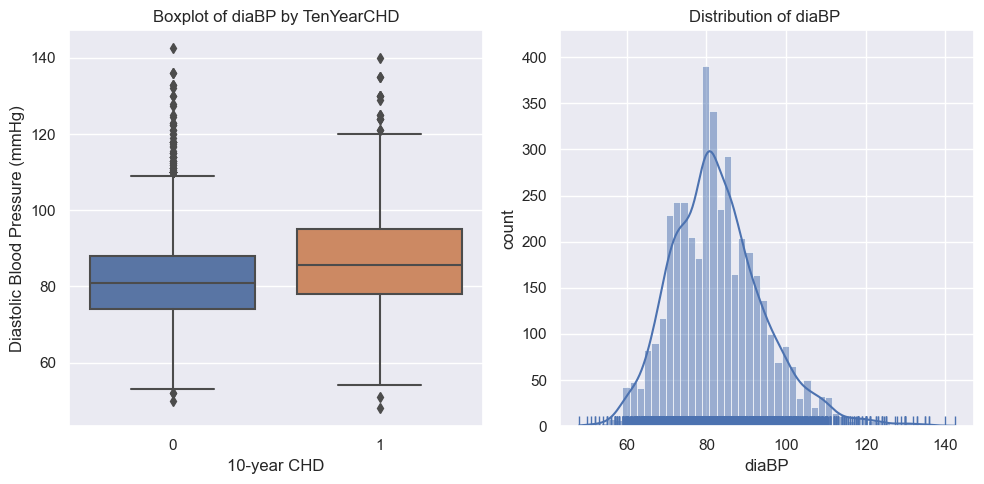

In [ ]:
# diaBP
# Plt box plot and histogram
plot_box_and_hist(df,columns_to_get_outlier_boundaries[1],'Diastolic Blood Pressure (mmHg)' )

In [ ]:
print(list(outlier_upper_lower_values)[1])
print(outlier_upper_lower_values[columns_to_get_outlier_boundaries[1]])

diaBP
{'lower': 47.16091509738871, 'upper': 118.62601269874153}


In [ ]:
# the diaBP outlier counts
outlier_counts_info(df,'diaBP')


Number of Outliers above Upper Boundary (row count) : (41, 15)

TenYearCHD Counts
0    21
1    20
Name: TenYearCHD, dtype: int64

Number of Outliers below Lower Boundary(row count) : (0, 15)

TenYearCHD Counts
Series([], Name: TenYearCHD, dtype: int64)


In [ ]:
# remove dia outliers fro df_clean outliers 
# only upper outlier need to be removed
print (f'shape before: {df_clean.shape}')
df_clean = df_clean[df_clean['diaBP'] < outlier_upper_lower_values['diaBP']['upper']]
print (f'shape after: {df_clean.shape}')

shape before: (4190, 15)
shape after: (4169, 15)


##### glucose



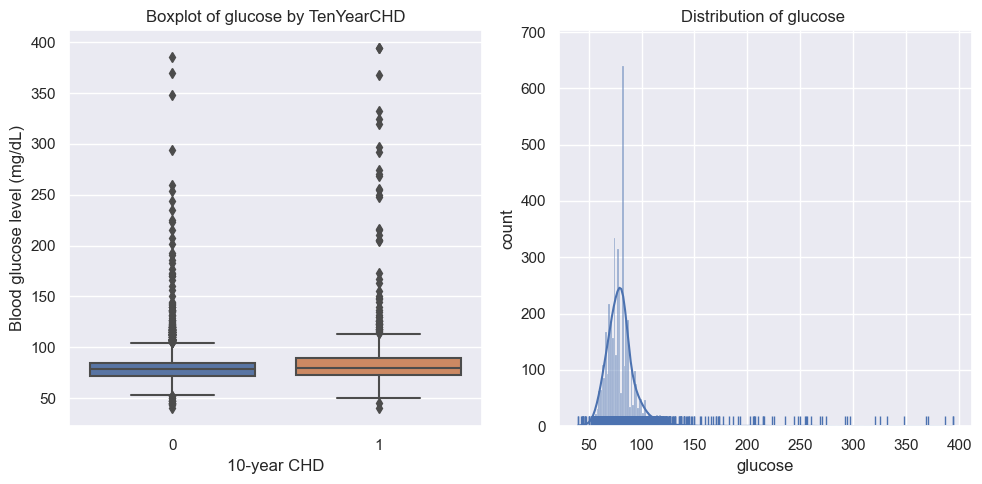

In [ ]:
# glucose
# Plt box plot and histogram
plot_box_and_hist(df,columns_to_get_outlier_boundaries[2],'Blood glucose level (mg/dL)' )

In [ ]:
print(list(outlier_upper_lower_values)[2])
print(outlier_upper_lower_values[columns_to_get_outlier_boundaries[2]])

glucose
{'lower': 13.456943864961474, 'upper': 150.47656262854503}


In [ ]:
outlier_counts_info(df,'glucose')


Number of Outliers above Upper Boundary (row count) : (50, 15)

TenYearCHD Counts
0    25
1    25
Name: TenYearCHD, dtype: int64

Number of Outliers below Lower Boundary(row count) : (0, 15)

TenYearCHD Counts
Series([], Name: TenYearCHD, dtype: int64)


In [ ]:
# remove glucose outliers
# only upper outliers needs to be removed
print (f'shape before: {df_clean.shape}')
df_clean = df_clean[df_clean['glucose'] < outlier_upper_lower_values['glucose']['upper']]
print (f'shape after: {df_clean.shape}')


shape before: (4169, 15)
shape after: (4125, 15)


##### totChol

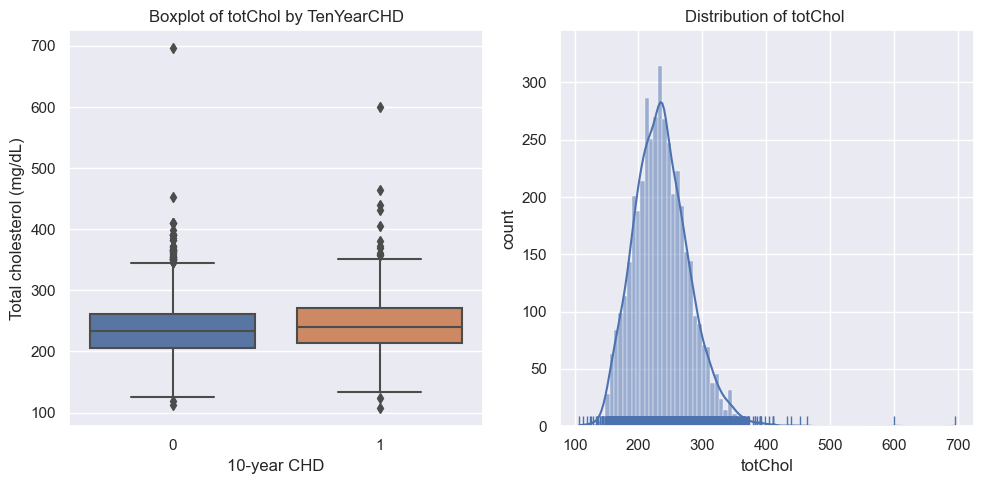

In [ ]:
# totchol
# Plt box plot and histogram
plot_box_and_hist(df,columns_to_get_outlier_boundaries[3],'Total cholesterol (mg/dL)' )

In [ ]:
print(list(outlier_upper_lower_values)[3])
print(outlier_upper_lower_values[columns_to_get_outlier_boundaries[3]])

totChol
{'lower': 103.74222755894743, 'upper': 369.7009434057135}


In [ ]:
outlier_counts_info(df,'totChol')


Number of Outliers above Upper Boundary (row count) : (25, 15)

TenYearCHD Counts
0    17
1     8
Name: TenYearCHD, dtype: int64

Number of Outliers below Lower Boundary(row count) : (0, 15)

TenYearCHD Counts
Series([], Name: TenYearCHD, dtype: int64)


In [ ]:
# remove totChol outliers
# only upper outliers needs to be removed
print (f'shape before: {df_clean.shape}')
df_clean = df_clean[df_clean['totChol'] < outlier_upper_lower_values['totChol']['upper']]
print (f'shape after: {df_clean.shape}')


shape before: (4125, 15)
shape after: (4100, 15)


##### BMI

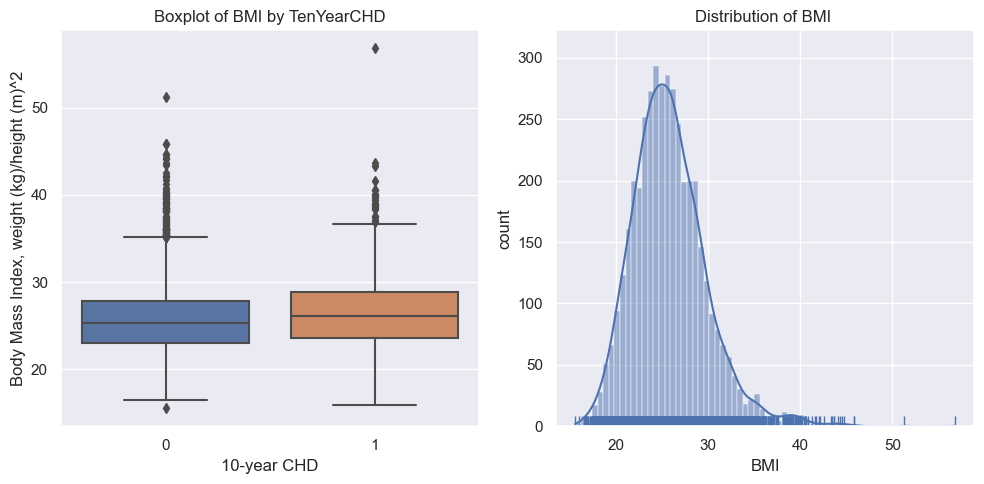

In [ ]:
# BMI
# Plt box plot and histogram
plot_box_and_hist(df,columns_to_get_outlier_boundaries[4],'Body Mass Index, weight (kg)/height (m)^2' )

In [ ]:
print(list(outlier_upper_lower_values)[4])
print(outlier_upper_lower_values[columns_to_get_outlier_boundaries[4]])

BMI
{'lower': 13.589149927526455, 'upper': 38.014865241944975}


In [ ]:
outlier_counts_info(df,'BMI')


Number of Outliers above Upper Boundary (row count) : (60, 15)

TenYearCHD Counts
0    43
1    17
Name: TenYearCHD, dtype: int64

Number of Outliers below Lower Boundary(row count) : (0, 15)

TenYearCHD Counts
Series([], Name: TenYearCHD, dtype: int64)


In [ ]:
# remove BMI outliers
# only upper outliers needs to be removed
print (f'shape before: {df_clean.shape}')
df_clean = df_clean[df_clean['BMI'] < outlier_upper_lower_values['BMI']['upper']]
print (f'shape after: {df_clean.shape}')


shape before: (4100, 15)
shape after: (4053, 15)


##### cigsPerDay

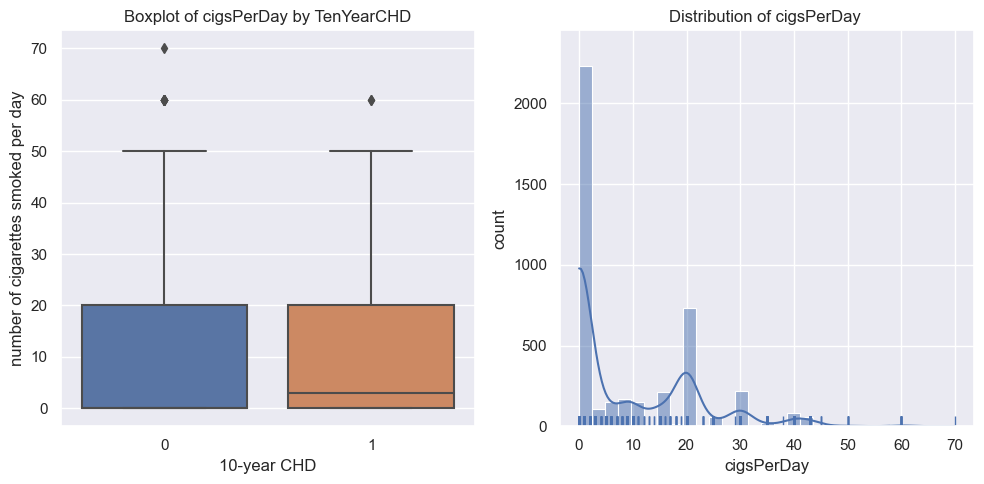

In [ ]:
# BMI
# Plt box plot and histogram
plot_box_and_hist(df,columns_to_get_outlier_boundaries[5],'number of cigarettes smoked per day' )

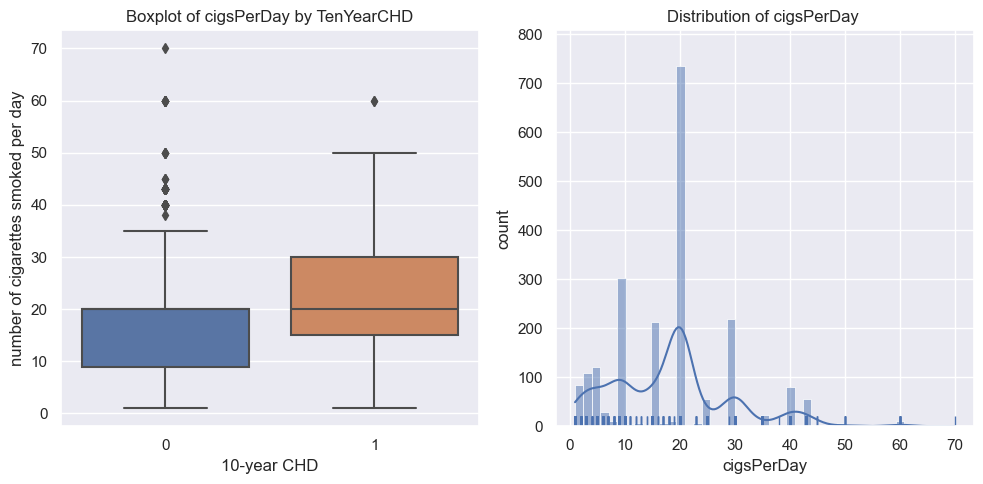

In [ ]:
#cigsPerday feature -  larger number of 0 entries  indicating non smokers
# therefore, to view distribution somkers and identify outliers the 0 obersvations for this column are filtered out replotted

cigs = df[df['cigsPerDay']>0] #excluding  0 values
# Plt box plot and histogram
plot_box_and_hist(cigs,'cigsPerDay','number of cigarettes smoked per day' )

In [ ]:
cig_lower, cigs_upper = outlier_std_cutoff_values(cigs, 'cigsPerDay')
print(cig_lower, cigs_upper)

-14.315621680176559 50.75792308415852


In [ ]:
outlier_counts_info(df,'cigsPerDay')


Number of Outliers above Upper Boundary (row count) : (21, 15)

TenYearCHD Counts
0    18
1     3
Name: TenYearCHD, dtype: int64

Number of Outliers below Lower Boundary(row count) : (0, 15)

TenYearCHD Counts
Series([], Name: TenYearCHD, dtype: int64)


In [ ]:
# remove cigPerDay outliers
# only upper outliers needs to be removed
print (f'shape before: {df_clean.shape}')
df_clean = df_clean[df_clean['cigsPerDay'] < cigs_upper]
print (f'shape after: {df_clean.shape}')


shape before: (4053, 15)
shape after: (4041, 15)


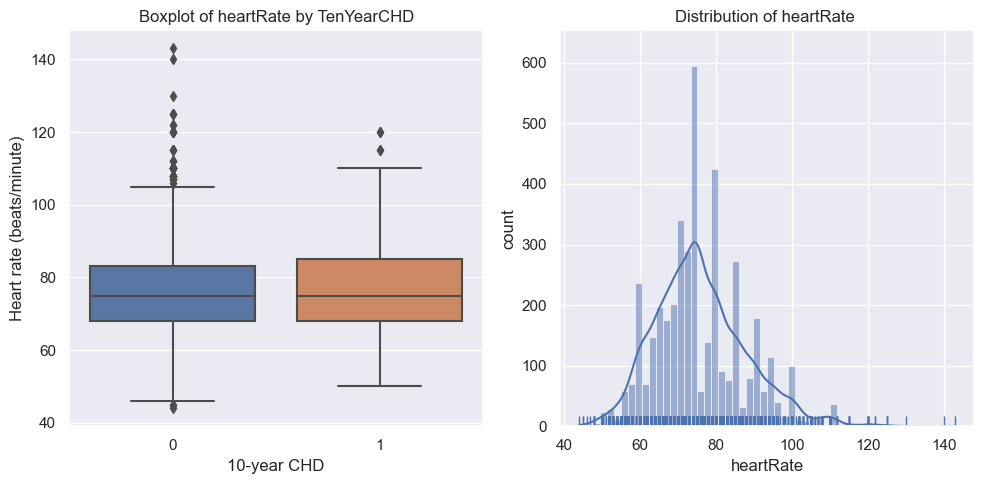

In [ ]:
# heartRate
# Plt box plot and histogram
plot_box_and_hist(df,columns_to_get_outlier_boundaries[6],'Heart rate (beats/minute)' )

In [ ]:
print(list(outlier_upper_lower_values)[6])
print(outlier_upper_lower_values[columns_to_get_outlier_boundaries[6]])

heartRate
{'lower': 39.803392667861786, 'upper': 111.95445486577047}


In [ ]:
outlier_counts_info(df,'heartRate')


Number of Outliers above Upper Boundary (row count) : (23, 15)

TenYearCHD Counts
0    19
1     4
Name: TenYearCHD, dtype: int64

Number of Outliers below Lower Boundary(row count) : (0, 15)

TenYearCHD Counts
Series([], Name: TenYearCHD, dtype: int64)


In [ ]:
# remove heart outliers
# only upper outliers needs to be removed
print (f'shape before: {df_clean.shape}')
df_clean = df_clean[df_clean['heartRate'] < outlier_upper_lower_values['heartRate']['upper']]
print (f'shape after: {df_clean.shape}')

shape before: (4041, 15)
shape after: (4019, 15)


## Scale dataset

In [ ]:
print(df_clean.shape)
df_clean['TenYearCHD'].value_counts()

(4019, 15)


0    3455
1     564
Name: TenYearCHD, dtype: int64

In [ ]:
clean_corr =  df_clean.corr() # corrlation matrix

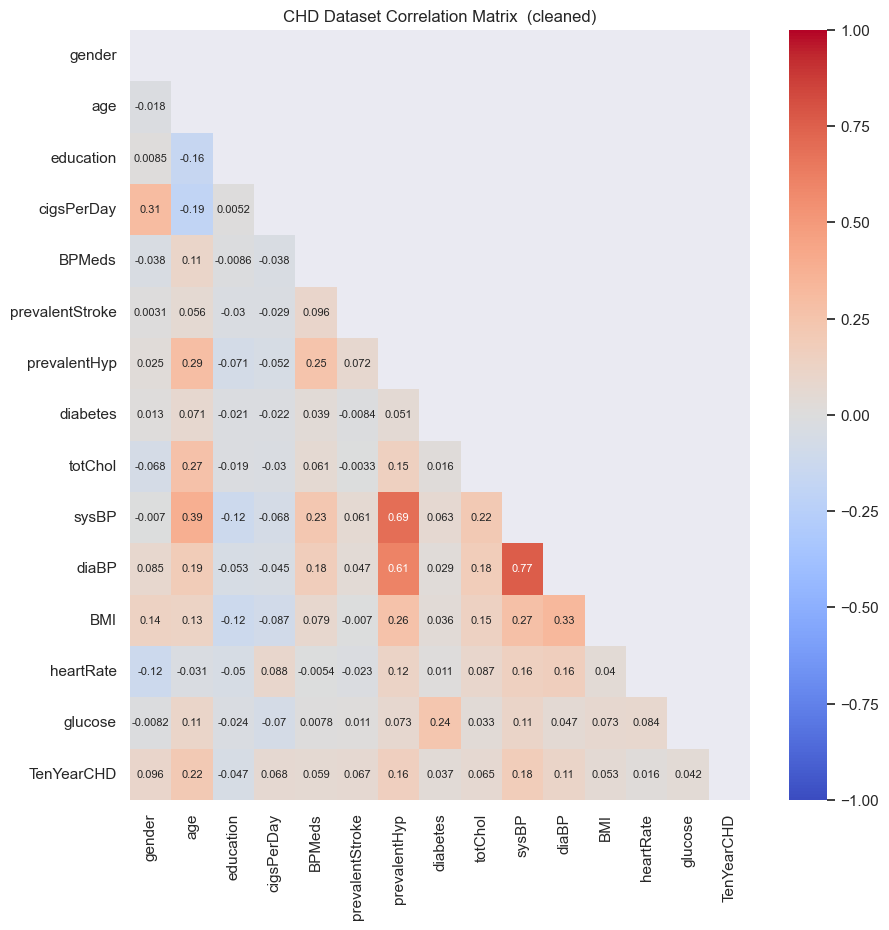

In [ ]:
# Plot the correlation matrix of the dataset

# Create a mask upper triangle
mask = np.zeros_like(clean_corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

sns.set(font_scale=1.0)
plt.figure(figsize=(10,10))
sns.heatmap(
    clean_corr, 
    annot=True, 
    annot_kws={'size': 8}, 
    cmap='coolwarm', 
    cbar=True, 
    vmin=-1, 
    vmax=1, 
    mask=mask
    )

# Show the plot
plt.title('CHD Dataset Correlation Matrix  (cleaned)')
plt.show()


In [ ]:
# Scale data
 
scaler = MinMaxScaler()
df_clean_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_clean_scaled.head()

gender       age  education  cigsPerDay  BPMeds  prevalentStroke  \
0     1.0  0.184211   1.000000        0.00     0.0              0.0   
1     0.0  0.368421   0.333333        0.00     0.0              0.0   
2     1.0  0.421053   0.000000        0.40     0.0              0.0   
3     0.0  0.763158   0.666667        0.60     0.0              0.0   
4     0.0  0.368421   0.666667        0.46     0.0              0.0   

   prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  heartRate  \
0           0.0       0.0  0.338462  0.196507  0.314286  0.518603   0.545455   
1           0.0       0.0  0.550000  0.327511  0.471429  0.598457   0.772727   
2           0.0       0.0  0.530769  0.384279  0.457143  0.444646   0.469697   
3           1.0       0.0  0.453846  0.580786  0.671429  0.591652   0.318182   
4           0.0       0.0  0.684615  0.406114  0.514286  0.343013   0.621212   

    glucose  TenYearCHD  
0  0.336364         0.0  
1  0.327273         0.0  
2  0.272727         0.0  
3  0.572727         1.0  
4  0.409091         0.0

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'cigsPerDay'}>],
       [<AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>, <AxesSubplot:>]],
      dtype=object)

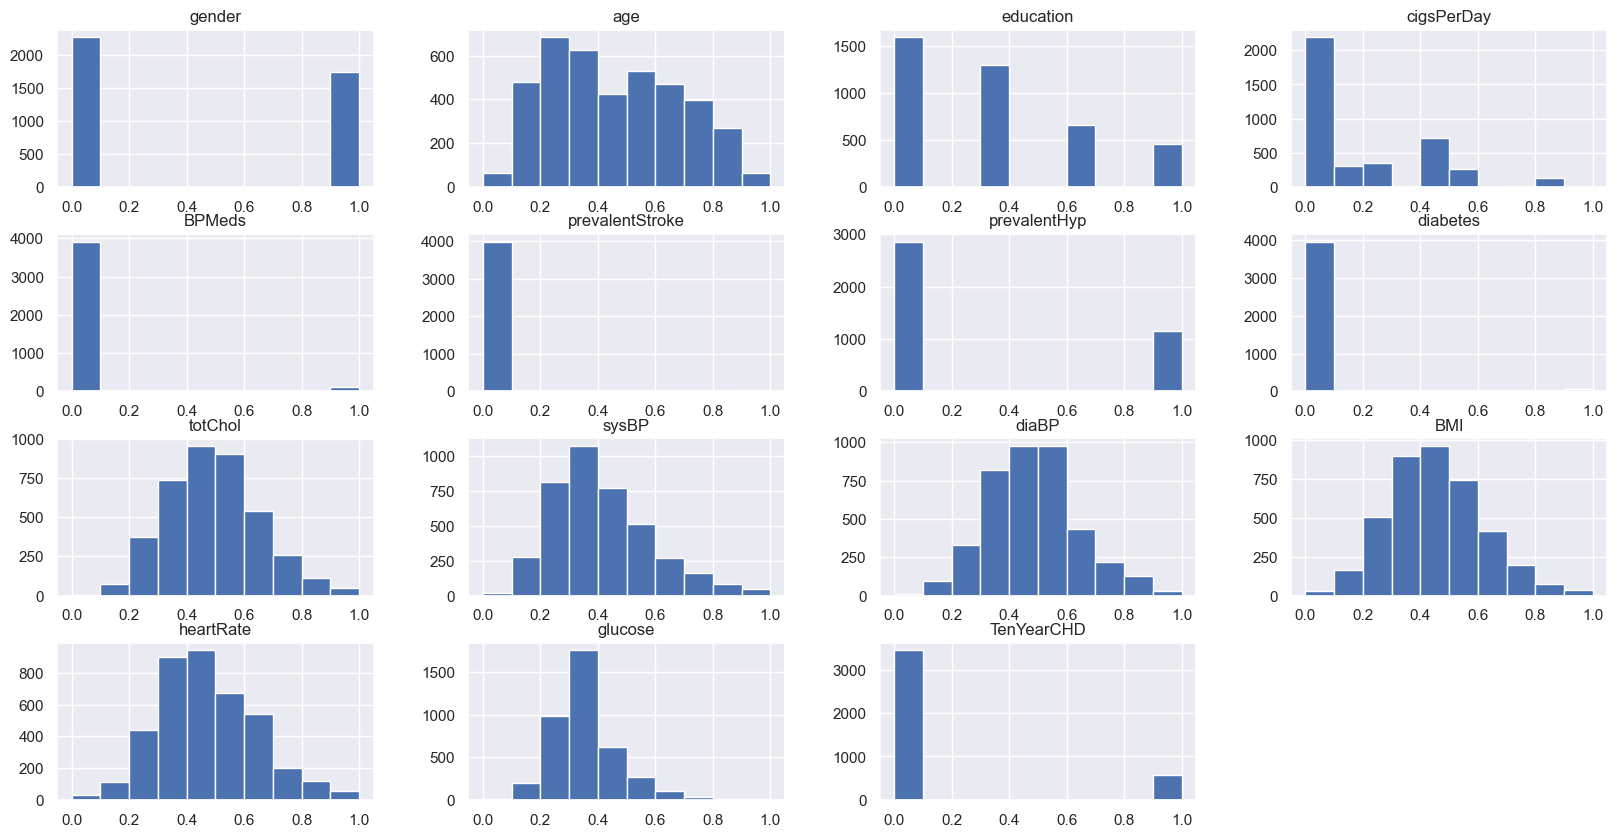

In [ ]:
df_clean_scaled.hist(figsize=(20,10))

In [337]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

## Split data Set

* df =  original dataset(with nulls replaced and datatypes updated)
* df_clean =  outliers removed from  df
* df_clean_scaled =  df_clean  with scaled data

In [341]:
# clean data set

# df_clean
X, y = prep_data(df, 'TenYearCHD')
# Split Data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# df_clean
X_clean, y_clean = prep_data(df_clean, 'TenYearCHD')
# Split Data into training and test data
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# df_clean_scaled
X_scaled, y_scaled = prep_data(df_clean_scaled, 'TenYearCHD')
# Split Data into training and test data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


## Machine Learning

###  Initial Evaluation with Logistic Regression with different  the  following datasets
* df =  original dataset(with nulls replaced and datatypes updated)
* df_clean =  outliers removed from  df
* df_clean_scaled =  df_clean  with scaled data

In [379]:
def model_train_evaluate(model, X_train, y_train, X_test, y_test):
    """Train model and print classification report

    Args:
        model (model): ML model
        X_train (df): X training data
        y_train (df): y training data
        X_test (df): X test data
        y_test (df): y_test Data
    """
    # train model (with df)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    model_name = type(model).__name__

    # print classification report
    report = classification_report(y_test, y_pred)
    
    print(f'{model_name} classification report \n')
    print(report)
    return report


In [385]:
model = LogisticRegression(max_iter=10000)
model_report = model_train_evaluate(model,X_train, y_train, X_test, y_test)

LogisticRegression classification report 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



In [387]:
model_clean = LogisticRegression(max_iter=10000)

model_clean_report = model_train_evaluate(model_clean, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

LogisticRegression classification report 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       681
           1       0.70      0.06      0.11       123

    accuracy                           0.85       804
   macro avg       0.78      0.53      0.51       804
weighted avg       0.83      0.85      0.79       804



In [389]:
model_scaled = LogisticRegression(max_iter=10000)
model_scaled_report = model_train_evaluate(model_scaled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

LogisticRegression classification report 

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       681
         1.0       1.00      0.05      0.09       123

    accuracy                           0.85       804
   macro avg       0.93      0.52      0.51       804
weighted avg       0.88      0.85      0.79       804



### Initial Evaluation with Logistic Regression  with resampling

In [390]:
def model_resample_train_evaluate(sampler, model,X_train, y_train, X_test, y_test):
    """Train model and print classification report

    Args:
        sampler(method): resampling method object
        model (model): ML model object
        X_train (df): X training data
        y_train (df): y training data
        X_test (df): X test data
        y_test (df): y_test Data
    """
    #resample training data
    X_resampled, y_resampled = sampler.fit_resample(X_train,y_train)
    # train model (with df)
    model.fit(X_resampled, y_resampled)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    model_name = type(model).__name__
    sampler_name = type(sampler).__name__

    # print classification report
    report = classification_report(y_test, y_pred)
    print(f'{model_name} classification report ({sampler_name}\n')
    print(report)
    return report

In [392]:
# sampling method
sampler = RandomOverSampler()
# Model
model_resampled = LogisticRegression(max_iter=10000)

model_resampled_report = model_resample_train_evaluate(sampler,model_resampled, X_train, y_train, X_test, y_test )
print(model_report)


LogisticRegression classification report (RandomOverSampler

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       724
           1       0.24      0.65      0.35       124

    accuracy                           0.65       848
   macro avg       0.58      0.65      0.55       848
weighted avg       0.82      0.65      0.70       848

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



In [393]:
# Model
model_clean_resampled = LogisticRegression(max_iter=10000)

model__clean_resampled_report = model_resample_train_evaluate(sampler, model_clean_resampled, X_train_clean, y_train_clean, X_test_clean, y_test_clean )
print(model_clean_report)

LogisticRegression classification report (RandomOverSampler

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       681
           1       0.27      0.69      0.39       123

    accuracy                           0.67       804
   macro avg       0.60      0.68      0.58       804
weighted avg       0.82      0.67      0.71       804

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       681
           1       0.70      0.06      0.11       123

    accuracy                           0.85       804
   macro avg       0.78      0.53      0.51       804
weighted avg       0.83      0.85      0.79       804



In [394]:
# Model
model_scaled_resampled = LogisticRegression(max_iter=10000)

model__scaled_resampled_report = model_resample_train_evaluate(sampler, model_scaled_resampled, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled )
print(model_scaled_report)

LogisticRegression classification report (RandomOverSampler

              precision    recall  f1-score   support

         0.0       0.92      0.65      0.76       681
         1.0       0.27      0.71      0.39       123

    accuracy                           0.66       804
   macro avg       0.60      0.68      0.58       804
weighted avg       0.82      0.66      0.71       804

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       681
         1.0       1.00      0.05      0.09       123

    accuracy                           0.85       804
   macro avg       0.93      0.52      0.51       804
weighted avg       0.88      0.85      0.79       804

